# Task 3

1: 0.185307364005204
2: 0.060307364005204006
3: 0.002192635994795994
4: 0.029057364005204006
5: 0.013432364005204006
6: 0.005619864005204006
7: 0.001713614005204006
8: 0.00023951099479599391
9: 0.0007370515052040061
10: 0.0002487702552040061
11: 4.6296302040060855e-06
12: 0.00011744068229599391
13: 5.6405526045993915e-05
14: 2.5887947920993915e-05
15: 1.0629158858493915e-05


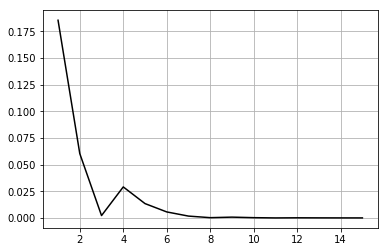

1: 0.5
2: 0.25
3: 0.125
4: 0.0625
5: 0.03125
6: 0.015625
7: 0.0078125
8: 0.00390625
9: 0.001953125
10: 0.0009765625
11: 0.00048828125
12: 0.000244140625
13: 0.0001220703125
14: 6.103515625e-05
15: 3.0517578125e-05


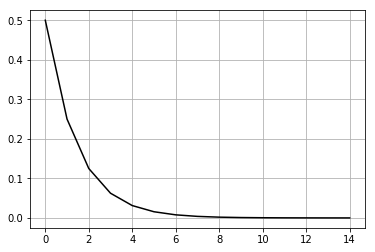

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math


def output_results(f, iterable, print_results=True):
    results = list(map(f, iterable))

    if print_results:
        for i, res in enumerate(results):
            print(f"{i+1}: {res}")

    plt.plot(list(iterable), results, 'k')
    plt.grid(True)
    plt.show()


def output_two(f, g, iterable):
    iterable = list(iterable)
    results1 = list(map(f, iterable))
    results2 = list(map(g, iterable))

    plt.plot(iterable, results1, 'k', iterable, results2, 'b')
    plt.grid(True)
    plt.show()


F_FUNC_CONST = 0.06064

exp_alfa = 0.0646926359947960

approx_error = lambda a0, b0: lambda n: 2**(-n-1)*(b0-a0)

f = lambda x: x * (math.e ** (-x)) - F_FUNC_CONST
a0, b0 = 0, 1


def bisection(f, a, b, n):
    s = (a + b) / 2
    if n <= 0 or f(s) == 0: return s
    elif np.sign(f(a)) != np.sign(f(s)):
        return bisection(f, a, s, n-1)
    else:
        return bisection(f, s, b, n-1)

n = 15

output_results(lambda n: abs(bisection(f, a0, b0, n) - exp_alfa), range(1, n+1))
output_results(approx_error(a0, b0), range(n))


# Task 4

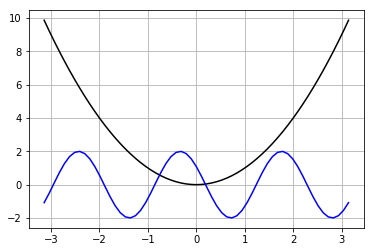

[4.150343069888133, -1.0806046117362795, 0.7844591306565467]


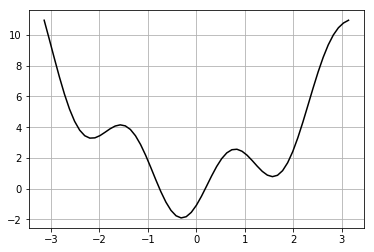

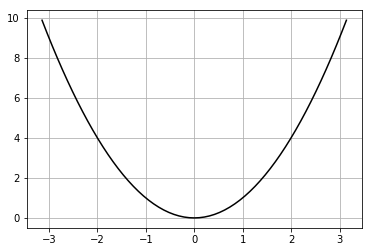

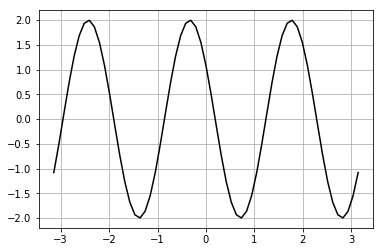

In [28]:
g = lambda x: x**2
h = lambda x: 2 * math.cos(3*x + 1)
f = lambda x: g(x) - h(x)

n = 30  # 10 25

iterable = np.array(list(map(lambda n: n * np.pi / 30, range(-n, n+1))))

output_two(g, h, iterable)

print(list(map(f, [-np.pi/2, 0, np.pi/2])))

output_results(f, iterable, print_results=False)
output_results(g, iterable, print_results=False)
output_results(h, iterable, print_results=False)


In [39]:
eps = 10**(-5)
steps_needed = lambda a0, b0, e: math.ceil(math.log( (b0-a0)/(2*e), 2 ))


a0, b0 = -np.pi/2, 0
n = steps_needed(a0, b0, eps)

print(bisection(f, a0, b0, n))

a0, b0 = 0, np.pi/2
n = steps_needed(a0, b0, eps)

print(bisection(f, a0, b0, n))


-0.7594223559150879
0.18458702410475458


# Task 5

In [4]:

def newton(f, fd, x0, n):
    if n <= 0: return x0
    xn = newton(f, fd, x0, n-1)
    return xn - f(xn) / fd(xn)

f = lambda R: lambda x: 1/x - R
fd = lambda x: -(1/x**2)
x0 = 0.1


r_inverse = lambda R: lambda n: newton(f(R), fd, x0, n)


def output(f, f_exp, R, iterable):
    print(f"\nR: {R}")
    print(f"Actual: {f_exp(R)}. Results for n ∊ {list(iterable)}")
    print(list(map(f(R), iterable)))
    print(f"\n6th error: {abs(f(R)(6) - (1/R))}")
    print(f"7th error: {abs(f(R)(7) - f_exp(R))}")
    print(f"9th error: {abs(f(R)(9) - f_exp(R))}")
    print('-'*30)

xs = [3, 5, 7, 10]
inv = lambda x: 1/x

output(r_inverse, inv, 3, xs)
output(r_inverse, inv, 5, xs)
output(r_inverse, inv, 11, xs)
output(r_inverse, inv, 16, xs)
output(r_inverse, inv, 19, xs)



R: 3
Actual: 0.3333333333333333. Results for n ∊ [3, 5, 7, 10]
[0.31411733, 0.3333296519077525, 0.33333333333333337, 0.3333333333333333]

6th error: 4.0658698630124945e-11
7th error: 5.551115123125783e-17
9th error: 0.0
------------------------------

R: 5
Actual: 0.2. Results for n ∊ [3, 5, 7, 10]
[0.19921875, 0.19999999995343387, 0.2, 0.2]

6th error: 0.0
7th error: 0.0
9th error: 0.0
------------------------------

R: 11
Actual: 0.09090909090909091. Results for n ∊ [3, 5, 7, 10]
[0.09090909, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]

6th error: 0.0
7th error: 0.0
9th error: 0.0
------------------------------

R: 16
Actual: 0.0625. Results for n ∊ [3, 5, 7, 10]
[0.06145024, 0.06249999502583681, 0.0625, 0.0625]

6th error: 3.885780586188048e-16
7th error: 0.0
9th error: 0.0
------------------------------

R: 19
Actual: 0.05263157894736842. Results for n ∊ [3, 5, 7, 10]
[0.029975409999999987, 0.05082437693668815, 0.05263150578502506, 0.052631578947368425]

6th err

# Task 6

In [5]:

f = lambda R: lambda x: 1/x - math.sqrt(R)
fd = lambda x: -(1/x**2)
x0 = 0.1

inv_sqrt = lambda x: 1/math.sqrt(x)
r_inverse_square = lambda R: lambda n: newton(f(R), fd, x0, n)

xs = [3, 5, 7, 10]

output(r_inverse_square, inv_sqrt, 2, xs)
output(r_inverse_square, inv_sqrt, 8, xs)
output(r_inverse_square, inv_sqrt, 9, xs)
output(r_inverse_square, inv_sqrt, 16, xs)
output(r_inverse_square, inv_sqrt, 17, xs)



R: 2
Actual: 0.7071067811865475. Results for n ∊ [3, 5, 7, 10]
[0.49830910760623925, 0.7017309253311349, 0.7071067788242453, 0.7071067811865475]

6th error: 0.20706591066041602
7th error: 2.3623021316865334e-09
9th error: 0.0
------------------------------

R: 8
Actual: 0.35355339059327373. Results for n ∊ [3, 5, 7, 10]
[0.32881506313085623, 0.35354491604971106, 0.35355339059327373, 0.35355339059327373]

6th error: 0.2285533903901421
7th error: 0.0
9th error: 0.0
------------------------------

R: 9
Actual: 0.3333333333333333. Results for n ∊ [3, 5, 7, 10]
[0.31411733, 0.3333296519077525, 0.33333333333333337, 0.3333333333333333]

6th error: 0.2222222221815635
7th error: 5.551115123125783e-17
9th error: 0.0
------------------------------

R: 16
Actual: 0.25. Results for n ∊ [3, 5, 7, 10]
[0.24580096, 0.24999998010334723, 0.25, 0.25]

6th error: 0.18749999999999845
7th error: 0.0
9th error: 0.0
------------------------------

R: 17
Actual: 0.24253562503633297. Results for n ∊ [3, 5, 7, 

# Task 7

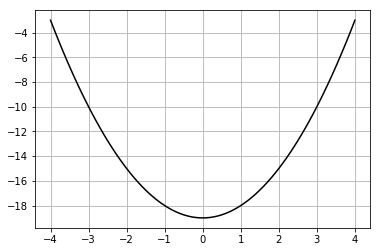

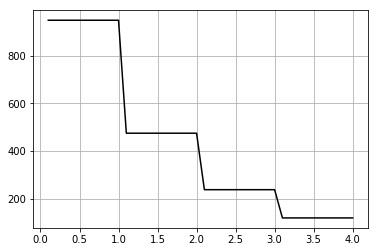


R: 3
Actual: 1.7320508075688772. Results for n ∊ [3, 5, 7, 10, 20, 75]
[37.52624650064986, 9.481321736677387, 2.7556265990846325, 1.7320761810940055, 1.7320508075688772, 1.7320508075688774]

6th error: 4.565533325469935
7th error: 1.0235757915157553
9th error: 0.009400719555755277
------------------------------

R: 5
Actual: 2.23606797749979. Results for n ∊ [3, 5, 7, 10, 20, 75]
[62.526247900233976, 15.731417855583334, 4.323854266651336, 2.236538802498685, 2.23606797749979, 2.23606797749979]

6th error: 7.8246265805392055
7th error: 2.0877862891515466
9th error: 0.04635998583512713
------------------------------

R: 11
Actual: 3.3166247903554. Results for n ∊ [3, 5, 7, 10, 20, 75]
[137.52624904550288, 34.48149668303607, 9.01621442603814, 3.33045647682484, 3.3166247903554, 3.3166247903554]

6th error: 17.309345087915187
7th error: 5.69958963568274
9th error: 0.3170483483212023
------------------------------

R: 16
Actual: 4.0. Results for n ∊ [3, 5, 7, 10, 20, 75]
[200.02624934377286,

In [19]:
f = lambda R: lambda x: x**2 - R
fd = lambda x: 2 * x

x0 = 10**(-2)
square = lambda R: lambda n: newton(f(R), fd, x0, n)

xs = [3, 5, 7, 10, 20, 75]

n = 40

R = 19

output_results(f(R), np.array(list(map(lambda n: n/10, range(-n, n+1)))), print_results=False)
output_results(square(R), np.array(list(map(lambda n: n/10, range(1, n+1)))), print_results=False)

output(square, math.sqrt, 3, xs)
output(square, math.sqrt, 5, xs)
output(square, math.sqrt, 11, xs)
output(square, math.sqrt, 16, xs)
output(square, math.sqrt, 19, xs)
output(square, math.sqrt, 399, xs)

